# Dataset

In [7]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Récupération du dataset

In [23]:
PATH = "Dataset/"
IMAGE_TYPE = ["Brain Tumor CT scan Images", "Brain Tumor MRI images"]
PATIENT_TYPE = ["Healthy", "Tumor"]

SIZE = (192, 192)
BATCH = 32
EPOCHS = 5

In [26]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=PATH + IMAGE_TYPE[0],
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH,
    image_size=SIZE,
    seed=7,
    validation_split=0.4,
    subset='both',
    verbose=True
)

Found 4618 files belonging to 2 classes.
Using 2771 files for training.
Using 1847 files for validation.


2025-01-08 10:47:24.405032: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


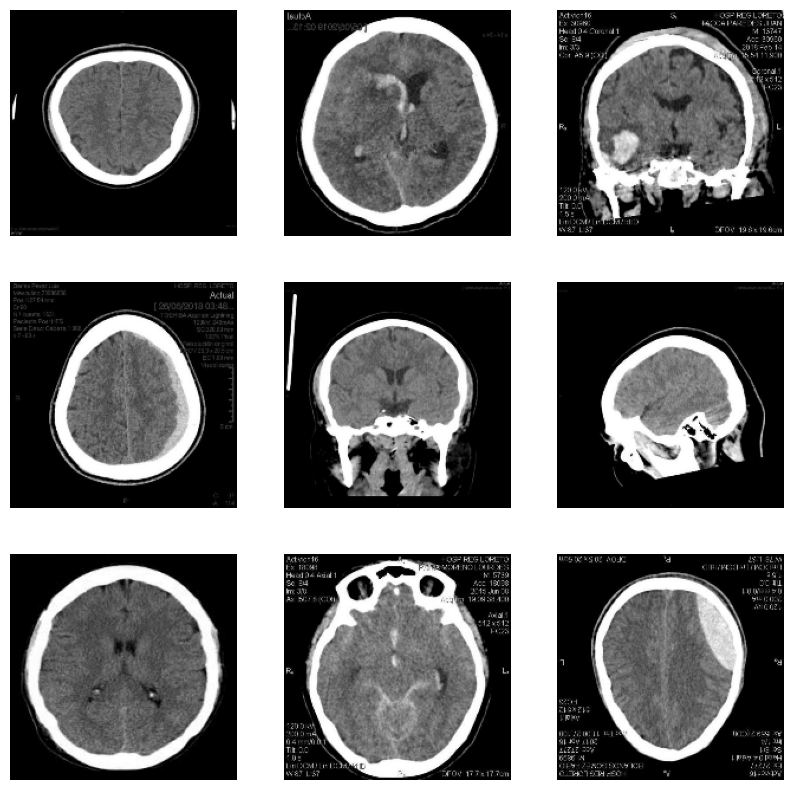

In [25]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')

In [5]:
def preprocessing(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, SIZE)
    return img, label

### Définition du CNN

In [ ]:
def cnnModel():
    model = Sequential()
    model.add(keras.layers.Input(shape=(192, 192, 3)))
    # Layer 1
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    # Layer 2
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    # Layer 3
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    # Layer 4
    model.add(keras.layers.Conv2D(192, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    # Flatten
    model.add(keras.layers.Flatten())

    # MLP
    model.add(keras.layers.Dense(1024, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(2, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    return model

In [19]:
model = cnnModel()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 190, 190, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 95, 95, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 93, 93, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 44, 44, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 20, 20, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 19200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │    19,661,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,107,906 (76.71 MB)

 Trainable params: 20,107,906 (76.71 MB)

 Non-trainable params: 0 (0.00 B)

### Entraînement du modèle

In [30]:
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 452ms/step - accuracy: 0.9505 - loss: 0.1236 - val_accuracy: 0.9410 - val_loss: 0.1650
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 454ms/step - accuracy: 0.9613 - loss: 0.0896 - val_accuracy: 0.9529 - val_loss: 0.1290
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 40s 460ms/step - accuracy: 0.9709 - loss: 0.0764 - val_accuracy: 0.9502 - val_loss: 0.1579
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 454ms/step - accuracy: 0.9681 - loss: 0.0796 - val_accuracy: 0.9415 - val_loss: 0.3500
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 40s 457ms/step - accuracy: 0.9678 - loss: 0.0604 - val_accuracy: 0.9589 - val_loss: 0.1299


### Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Accuracy: {test_accuracy:.2f}")

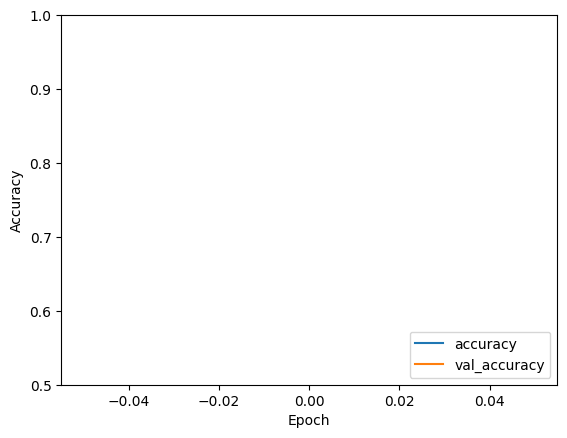

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

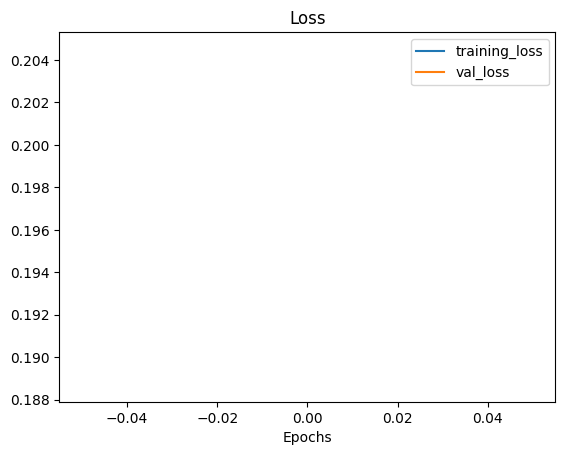

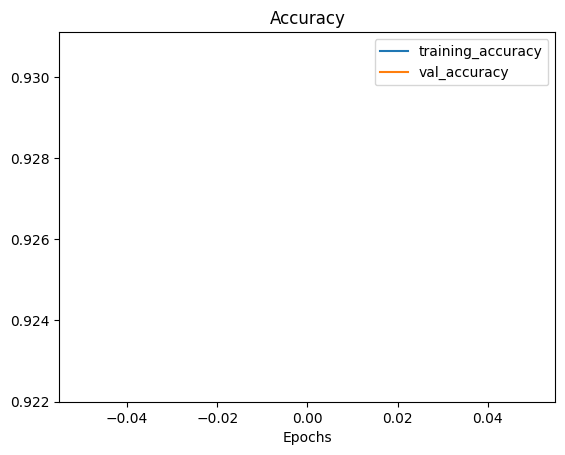

In [29]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

plot_loss_curves(history=history)